In [46]:
from wy_baseline import wy_tradegy, selc_func
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

## import data

In [47]:
data = pd.read_csv('../data/processed.csv')
from datetime import datetime
data['date'] = pd.to_datetime(data['date'])
data = data.loc[data['date'] >= pd.to_datetime('2020-01-09')]
predict = pd.read_csv('../data/predict.csv')

In [48]:
open_truth = list(data['open'])
close_truth = list(data['close'])
high = list(predict['high'])
high_truth = list(predict['high_truth'])
low = list(predict['low'])
low_truth = list(predict['low_truth'])

## trading

In [49]:
rk = 1.0
for i in range(len(open_truth)):
    amptl = wy_tradegy(high[i], low[i], high_truth[i], low_truth[i], open_truth[i], close_truth[i], 0.5)
    rk *=amptl

print(rk)

1.2199226214377918


## set different water to check the results

In [50]:
def set(x):
    rk = 1.0
    #print(wy_tradegy(1, 0.8, 1, 0.4, 0.5, 0.5, 0.5))
    for i in range(len(open_truth)):
        amptl = wy_tradegy(high[i], low[i], high_truth[i], low_truth[i], open_truth[i], close_truth[i], x)
        #amptl = wy_tradegy(open_truth[i] + (high[i] - low[i]) / 2, open_truth[i] - (high[i] - low[i]) / 2, high_truth[i], low_truth[i], open_truth[i], close_truth[i], 0.5)
        
        rk *=amptl

    return rk

Text(0.5, 0, 'setwater')

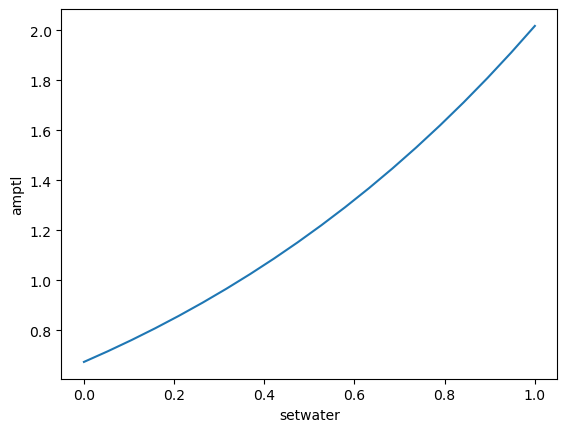

In [51]:
plt.plot(np.linspace(0,1,20), [set(x/100) for x in range(0,100,5)])
plt.ylabel('amptl')
plt.xlabel('setwater')